In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [37]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
df.tail()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [6]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop=None)  # drop=None keeps all columns

# Fit & transform only the target column
encoded_array = ohe.fit_transform(df[['Gender']])

# Create DataFrame for the encoded columns
encoded_df = pd.DataFrame(
    encoded_array.toarray(), # Convert sparse matrix to dense array
    columns=ohe.get_feature_names_out(['Gender']),
    index=df.index  # Keep same index to align during merge
)

# Merge with original dataset (dropping the original column if needed)
df_encoded = pd.concat([df.drop(columns=['Gender']), encoded_df], axis=1)

df_encoded

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Female  Gender_Male  
0              0.0          1.0  
1              0.0          1.0  
2              1.0          0.0  
3              1.0          0.0  
4              1.0          0.0  
..             ...          ...  
195            1.0          0.0  
196            1.0          0.0  
197            0.0          1.0  
198            0.0          1.0  
199            0.0          1.0  

[200 rows x 6 columns]

In [14]:
df1 = df_encoded.drop(columns=['Gender_Female'])
df1

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0             1   19                  15                      39          1.0
1             2   21                  15                      81          1.0
2             3   20                  16                       6          0.0
3             4   23                  16                      77          0.0
4             5   31                  17                      40          0.0
..          ...  ...                 ...                     ...          ...
195         196   35                 120                      79          0.0
196         197   45                 126                      28          0.0
197         198   32                 126                      74          1.0
198         199   32                 137                      18          1.0
199         200   30                 137                      83          1.0

[200 rows x 5 columns]

In [26]:
X = df1.iloc[:,[2,3]].values
X[:11]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14]])

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

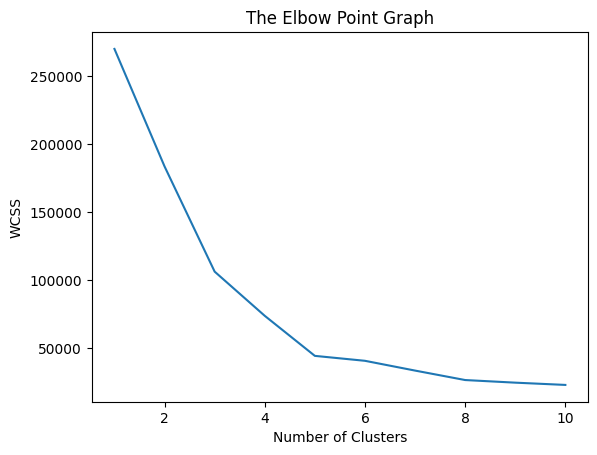

In [28]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)


In [30]:
y = kmeans.fit_predict(X)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


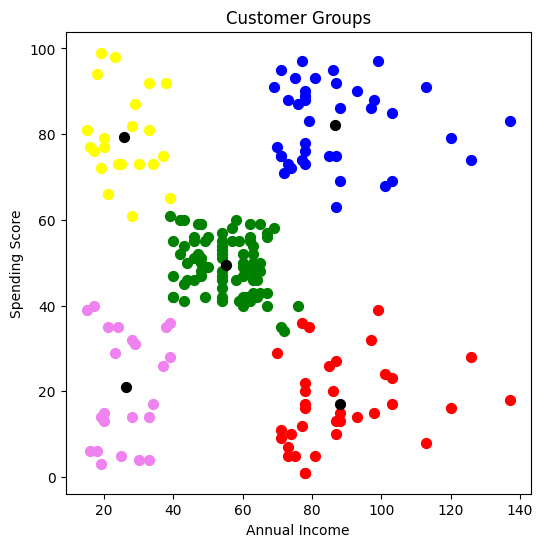

In [31]:
# Plotting all the clusters
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='violet', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [32]:
# Assuming kmeans is your trained KMeans model
labels = kmeans.predict(X)  # or kmeans.labels_
df1['Cluster'] = labels


In [33]:
df1

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0             1   19                  15                      39          1.0   
1             2   21                  15                      81          1.0   
2             3   20                  16                       6          0.0   
3             4   23                  16                      77          0.0   
4             5   31                  17                      40          0.0   
..          ...  ...                 ...                     ...          ...   
195         196   35                 120                      79          0.0   
196         197   45                 126                      28          0.0   
197         198   32                 126                      74          1.0   
198         199   32                 137                      18          1.0   
199         200   30                 137                      83          1.0   

     Cluster  
0          4  
1          2  
2          4  
3          2  
4          4  
..       ...  
195        1  
196        3  
197        1  
198        3  
199        1  

[200 rows x 6 columns]

In [38]:
df1.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()


Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

In [39]:
cluster_labels = {
    0: 'Moderate Purchaser',
    1: 'VIP',
    2: 'Impulsive Buyer',
    3: 'Cautious / Potential VIP',
    4: 'Low Purchaser'
}

df1['Category'] = df1['Cluster'].map(cluster_labels)


In [40]:
df1

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0             1   19                  15                      39          1.0   
1             2   21                  15                      81          1.0   
2             3   20                  16                       6          0.0   
3             4   23                  16                      77          0.0   
4             5   31                  17                      40          0.0   
..          ...  ...                 ...                     ...          ...   
195         196   35                 120                      79          0.0   
196         197   45                 126                      28          0.0   
197         198   32                 126                      74          1.0   
198         199   32                 137                      18          1.0   
199         200   30                 137                      83          1.0   

     Cluster                  Category  
0          4             Low Purchaser  
1          2           Impulsive Buyer  
2          4             Low Purchaser  
3          2           Impulsive Buyer  
4          4             Low Purchaser  
..       ...                       ...  
195        1                       VIP  
196        3  Cautious / Potential VIP  
197        1                       VIP  
198        3  Cautious / Potential VIP  
199        1                       VIP  

[200 rows x 7 columns]

In [53]:
df1 = df1.drop(columns=['Cluster'])
df1

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0             1   19                  15                      39          1.0   
1             2   21                  15                      81          1.0   
2             3   20                  16                       6          0.0   
3             4   23                  16                      77          0.0   
4             5   31                  17                      40          0.0   
..          ...  ...                 ...                     ...          ...   
195         196   35                 120                      79          0.0   
196         197   45                 126                      28          0.0   
197         198   32                 126                      74          1.0   
198         199   32                 137                      18          1.0   
199         200   30                 137                      83          1.0   

                     Category  
0               Low Purchaser  
1             Impulsive Buyer  
2               Low Purchaser  
3             Impulsive Buyer  
4               Low Purchaser  
..                        ...  
195                       VIP  
196  Cautious / Potential VIP  
197                       VIP  
198  Cautious / Potential VIP  
199                       VIP  

[200 rows x 6 columns]

In [80]:
# Example new customer
new_customer = [[300, 40]]  # Annual Income = 85k, Spending Score = 80

# Predict cluster
predicted_cluster = kmeans.predict(new_customer)[0]

# Map to category
predicted_category = cluster_labels[predicted_cluster]
print(predicted_category)


Low Purchaser


In [81]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.553931997444648
